# Paddle Pop Group Parkinson Data Multiple Linear Regression

### Import Repository

In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

### Import CSV dataset

In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\Dropbox\PC\Documents\College Assignments\4th Semester\Computation Statistics\Final\datanew.csv')

### Heart Rate VS Wear Off Duration Scatter Plot

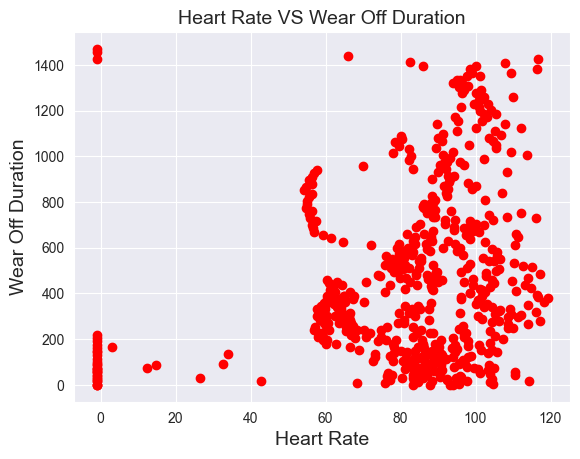

In [3]:
plt.scatter(df['heart_rate'], df['wo_duration'], color='red')
plt.title('Heart Rate VS Wear Off Duration', fontsize=14)
plt.xlabel('Heart Rate', fontsize=14)
plt.ylabel('Wear Off Duration', fontsize=14)
plt.grid(True)
plt.savefig("HeartRate.jpg")
plt.show()

### Stress Score VS Wear Off Duration Scatter Plot

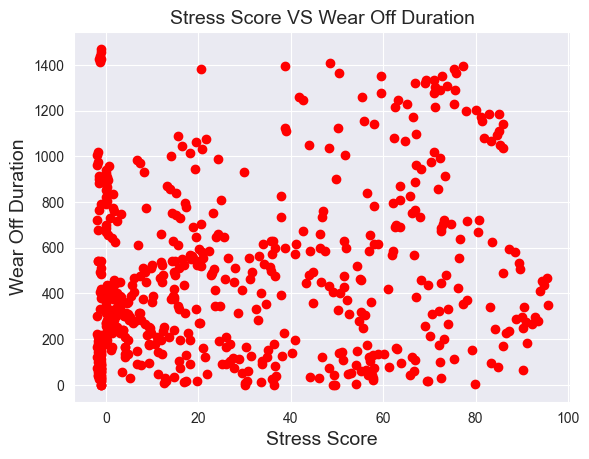

In [4]:
plt.scatter(df['stress_score'], df['wo_duration'], color='red')
plt.title('Stress Score VS Wear Off Duration', fontsize=14)
plt.xlabel('Stress Score', fontsize=14)
plt.ylabel('Wear Off Duration', fontsize=14)
plt.grid(True)
plt.savefig("StressScore.jpg")
plt.show()

### Time From Last Drug Taken VS Wear Off Duration Scatter Plot

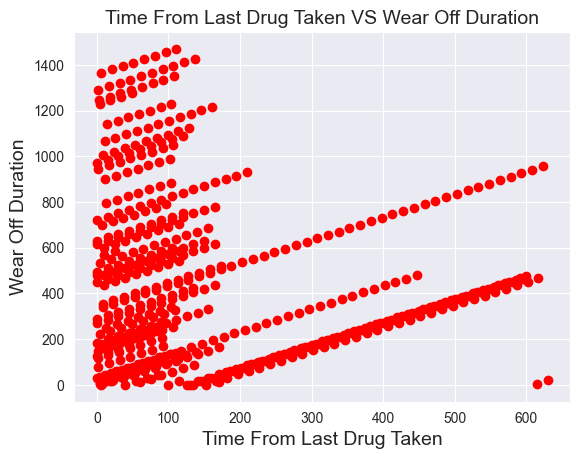

In [5]:
plt.scatter(df['time_from_last_drug_taken'], df['wo_duration'], color='red')
plt.title('Time From Last Drug Taken VS Wear Off Duration', fontsize=14)
plt.xlabel('Time From Last Drug Taken', fontsize=14)
plt.ylabel('Wear Off Duration', fontsize=14)
plt.grid(True)
plt.savefig("DrugTime.jpg")
plt.show()

### Set IV and DV

In [6]:
x = df[['heart_rate', 'stress_score', 'time_from_last_drug_taken']]
y = df['wo_duration']

### Calculate Regression with sklearn

In [7]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 216.7665338858005
Coefficients: 
 [2.45258723e+00 1.72733337e+00 9.40607544e-04]


### Calculate Regression with statsmodels

In [8]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            wo_duration   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     15.40
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           1.20e-09
Time:                        00:06:04   Log-Likelihood:                -4197.2
No. Observations:                 576   AIC:                             8402.
Df Residuals:                     572   BIC:                             8420.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<p style='background:green'>
So we can assume that <span style="font-weight:bold">Heart Rate</span> is the best variable to use to predict the "wearing-off" of anti-Parkinson Disease Medication
</p>

### Residual Plot Line Model

In [9]:
from sklearn.linear_model import LinearRegression
x = df['heart_rate']

In [10]:
model = LinearRegression()

In [11]:
model.fit(x.values.reshape(-1, 1), y)

LinearRegression()

In [12]:
model.intercept_

180.44899803905992

In [13]:
model.coef_

array([3.55295516])

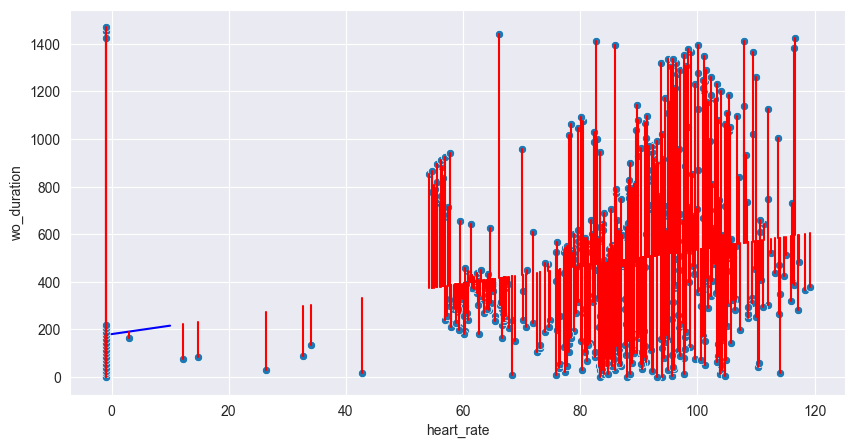

In [14]:
# Plots the data points and the regression
fig = plt.figure(figsize = (10,5))
ax = plt.axes()
sns.scatterplot(x = x, y = y, ax = ax)
sns.lineplot(x = [0, 10], y = [model.intercept_, (10 * model.coef_[0] + model.intercept_)], ax = ax, color = 'b')

# Plots the residuals
for i, j in zip(x, y):
    yreg = i * model.coef_[0] + model.intercept_
    ax.plot([i, i], [j, yreg], color = 'r')

plt.savefig('HeartRateLine.jpg')